In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils.cluster_regression import gaussian_regression
from utils.plotting import create_waffle_chart

from sklearn.model_selection import train_test_split
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [2]:
# Set plot resolution
%matplotlib inline
mpl.rcParams['figure.dpi'] = 140

In [3]:
# Load Dataset...
df = pd.read_csv('data/ex.csv')

dataset = df.copy()

X = dataset.values
x_cords = dataset['x'].values
y_cords = dataset['y'].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_cords, y_cords, test_size=0.20, random_state=np.random.seed(6))

X_test = np.stack((x_test, y_test), axis=1)
X_train = np.stack((x_train, y_train), axis=1)

## Cluster – Gaussian Mixture Regression

In [5]:
X_gm = X_test

gm = GaussianMixture(
    n_components=3,
    covariance_type='full',
    max_iter = 500,
    random_state = np.random.seed(4)).fit(X_gm)

# use whole dataset for prediction
y_pred = gm.predict(X)

# form sorted prediction data
y_pred_processed = {
    'Total': [len(np.where(y_pred == 0)[0]), len(
        np.where(y_pred == 1)[0]), len(np.where(y_pred == 2)[0])],
    'Cords': [np.where(y_pred == 0)[0], np.where(y_pred == 1)[0], np.where(y_pred == 2)[0]]}

df = pd.DataFrame(y_pred_processed).sort_values(
    by=['Total'], ignore_index=True)
df = pd.concat([df, pd.DataFrame(
    {'Cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3']})], sort=False, axis=1)
# print(df)


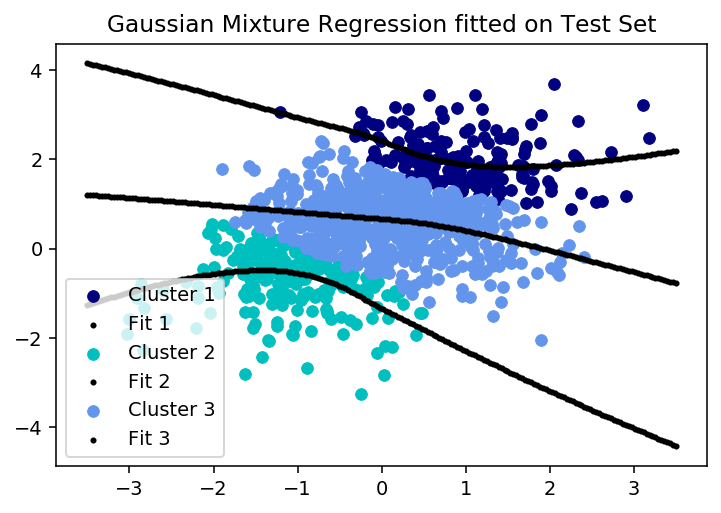

In [6]:
# Plotting cluster with regression
gaussian_regression(x_cords, y_cords, df,
                    'Gaussian Mixture Regression fitted on Test Set')


<Figure size 840x280 with 0 Axes>

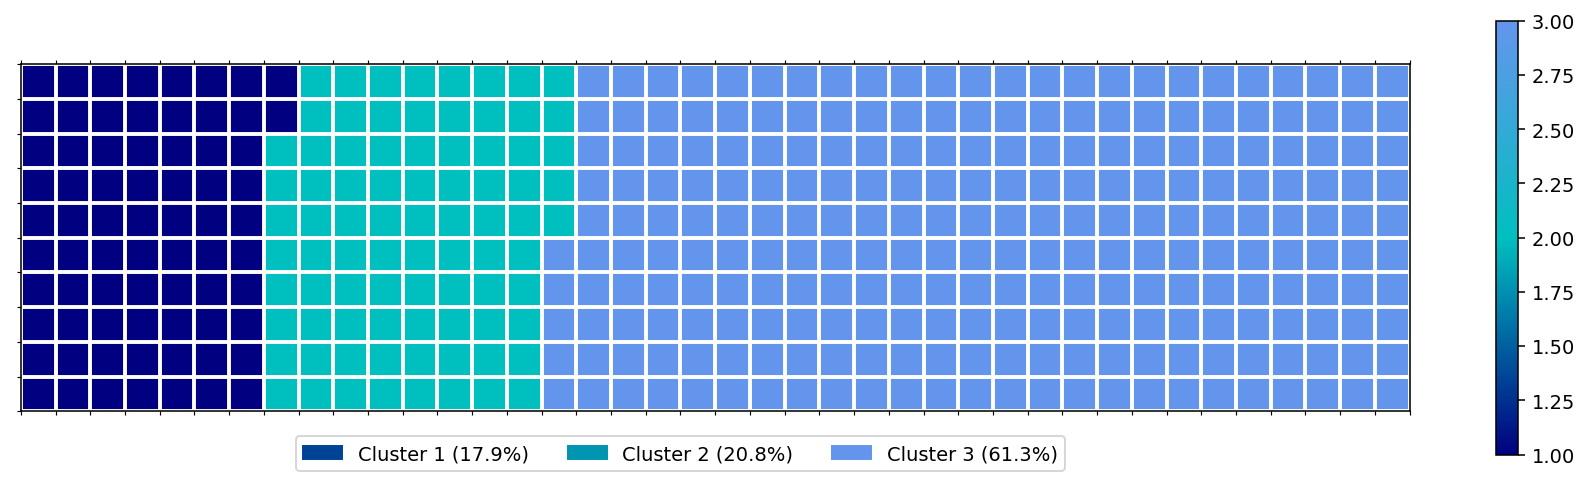

In [7]:
# Create waffle chart
width = 40  # width of chart
height = 10  # height of chart

categories = df['Cluster'].values  # categories
# print(categories)

values = df['Total']
# print(values)

create_waffle_chart(categories, values, height, width, value_sign='%')

## Cluster – Bayesian Gaussian Mixture Regression

In [8]:
X_bgm = X_test

bgm = BayesianGaussianMixture(
    n_components=3,
    covariance_type='full',
    max_iter = 500,
    random_state = np.random.seed(3)).fit(X_bgm)

# use train data for prediction
y_pred = bgm.predict(X)

# form sorted prediction data
y_pred_processed = {
    'Total': [len(np.where(y_pred == 0)[0]), len(
        np.where(y_pred == 1)[0]), len(np.where(y_pred == 2)[0])],
    'Cords': [np.where(y_pred == 0)[0], np.where(y_pred == 1)[0], np.where(y_pred == 2)[0]]}

df = pd.DataFrame(y_pred_processed).sort_values(
    by=['Total'], ignore_index=True)
df = pd.concat([df, pd.DataFrame(
    {'Cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3']})], sort=False, axis=1)
# print(df)


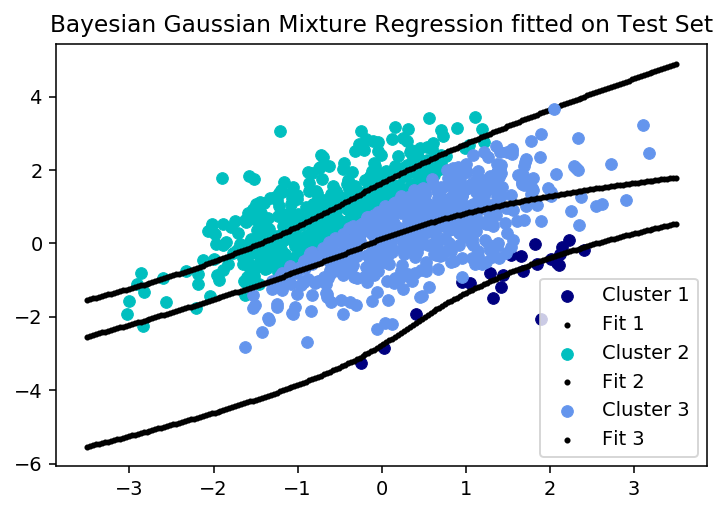

In [9]:
# Plotting...
gaussian_regression(x_cords, y_cords, df,
                    'Bayesian Gaussian Mixture Regression fitted on Test Set')

<Figure size 840x280 with 0 Axes>

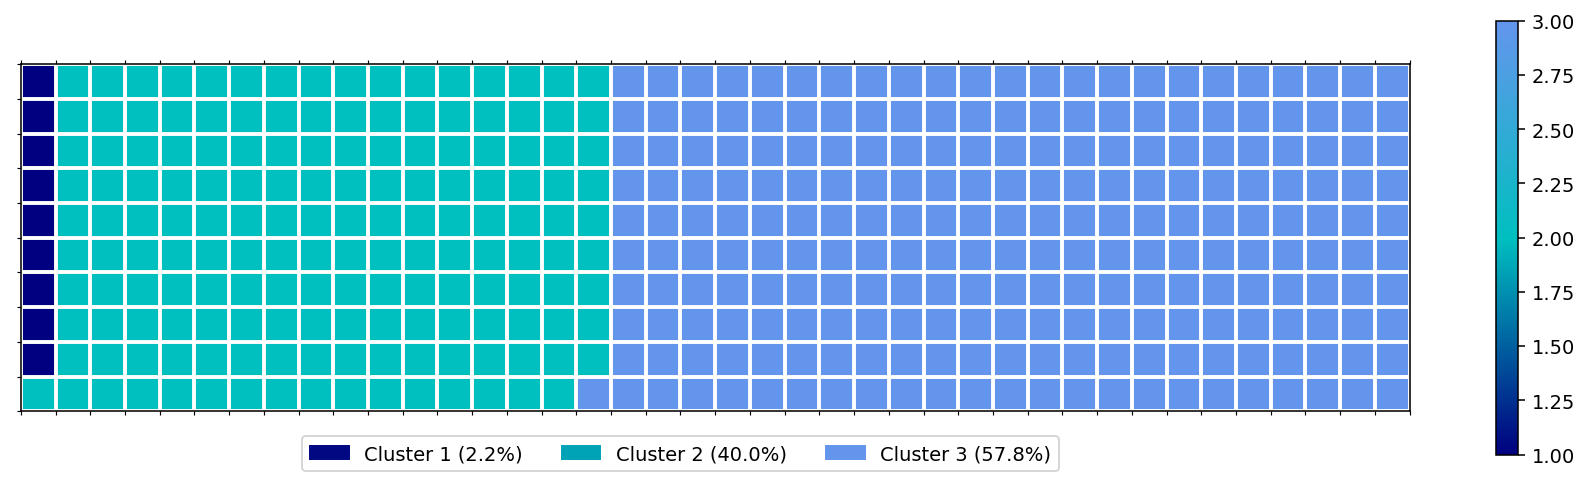

In [10]:
# Create waffle chart
width = 40  # width of chart
height = 10  # height of chart

categories = df['Cluster'].values  # categories
# print(categories)

values = df['Total']
# print(values)

create_waffle_chart(categories, values, height, width, value_sign='%')